Dataset: https://www.kaggle.com/datasets/toponowicz/spoken-language-identification/data
Since the dataset is 16 gbs big (and my ram is only 8 gbs), I have deleted 2/3rd of the training dataset using ReduceDataset script.
Create CSV script is used to create the csv file.
It is assumed that these pre requirements are already completed.

Spoken Language Detection:
In this notebook we will train a deep learning model that can predict the language of a spoken sentence between English, German, and Spanish.

The training data will be divided into train and valid.
It has a total of 26,100 audio files.
Every recording has files with different fragments, and fragments with different pitches and noise levels.

We start by doing the necessary imports.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from python_speech_features import mfcc, logfbank
import librosa

Next we proceed to processing the data.
We will be following this youtube playlist tutorial for audio processing:
https://www.youtube.com/playlist?list=PLhA3b2k8R3t2Ng1WW_7MiXeh1pfQJQi_P

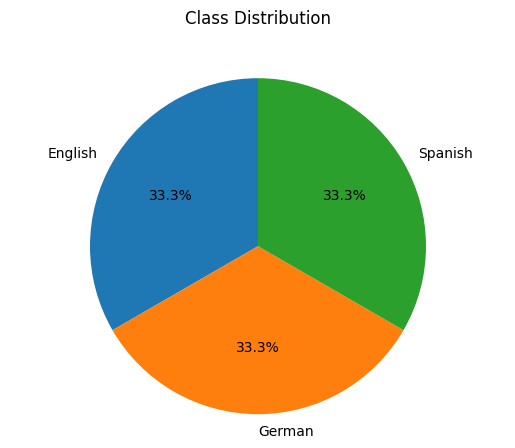

3


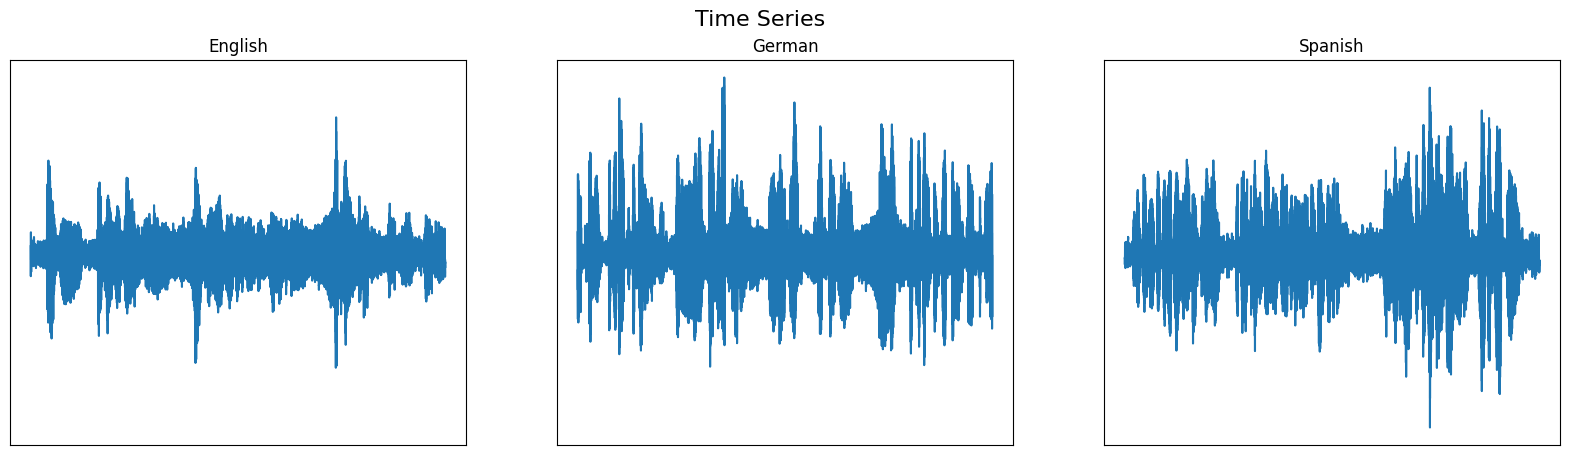

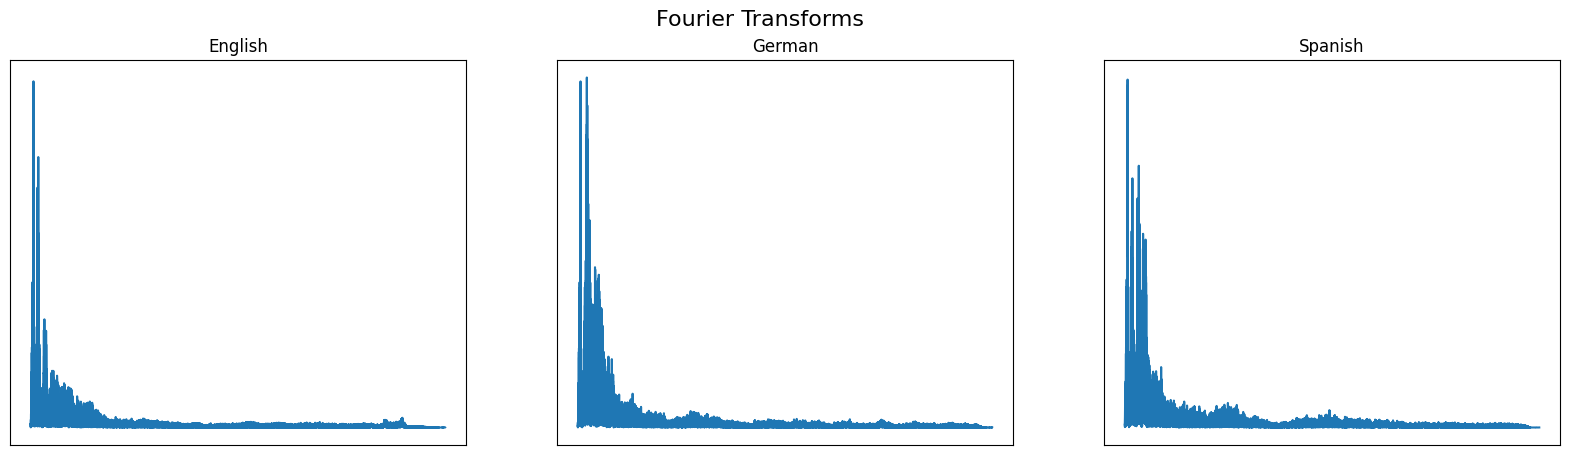

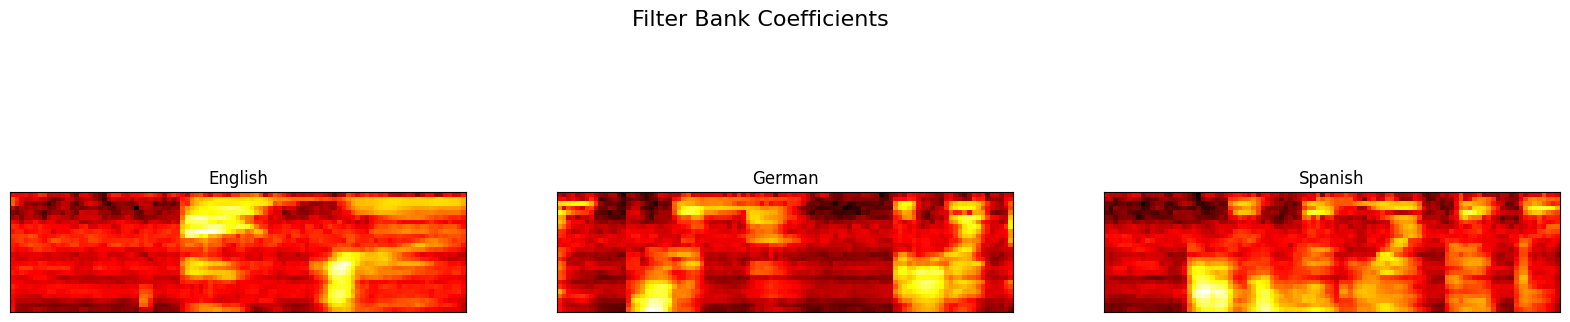

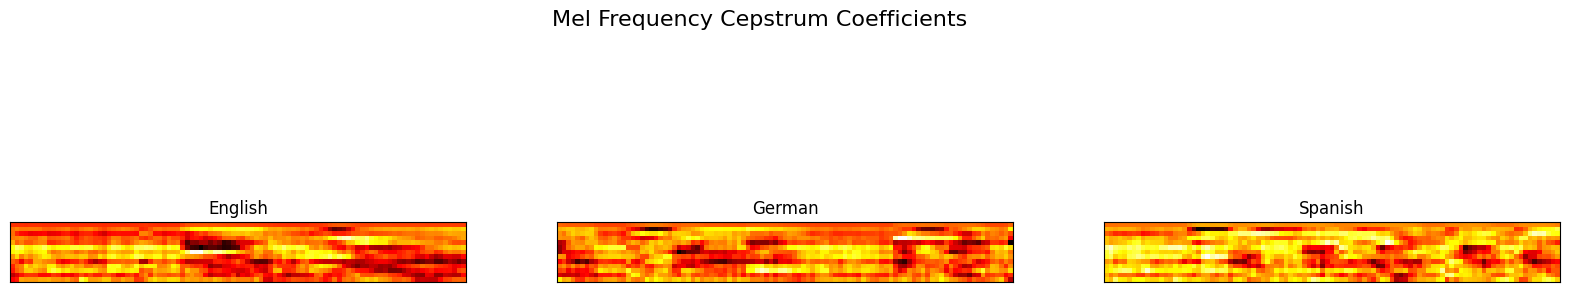

In [9]:
train_path = './dataset/train/wav_train'
test_path = './dataset/test/wav_test'

def plot_signals(signals):
    fig, axes = plt.subplots(nrows=1, ncols=3, sharex=False,
                             sharey=True, figsize=(20, 5))
    fig.suptitle('Time Series', size=16)
    i = 0
    for y in range(3):
        axes[y].set_title(list(signals.keys())[i])
        axes[y].plot(list(signals.values())[i])
        axes[y].get_xaxis().set_visible(False)
        axes[y].get_yaxis().set_visible(False)
        i += 1
            
def plot_fft(fft):
    fig, axes = plt.subplots(nrows=1, ncols=3, sharex=False,
                             sharey=True, figsize=(20, 5))
    fig.suptitle('Fourier Transforms', size=16)
    i = 0
    for y in range(3):
        data = list(fft.values())[i]
        Y, freq = data[0], data[1]
        axes[y].set_title(list(fft.keys())[i])
        axes[y].plot(freq, Y)
        axes[y].get_xaxis().set_visible(False)
        axes[y].get_yaxis().set_visible(False)
        i += 1
            
def plot_fbank(fbank):
    fig, axes = plt.subplots(nrows=1, ncols=3, sharex=False,
                             sharey=True, figsize=(20, 5))
    fig.suptitle('Filter Bank Coefficients', size=16)
    i = 0
    for y in range(3):
        axes[y].set_title(list(fbank.keys())[i])
        axes[y].imshow(list(fbank.values())[i], cmap='hot', interpolation='nearest')
        axes[y].get_xaxis().set_visible(False)
        axes[y].get_yaxis().set_visible(False)
        i += 1
    
def plot_mfccs(mfccs):
    fig, axes = plt.subplots(nrows=1, ncols=3, sharex=False,
                                sharey=True, figsize=(20, 5))
    fig.suptitle('Mel Frequency Cepstrum Coefficients', size=16)
    i = 0
    for y in range(3):
        axes[y].set_title(list(mfccs.keys())[i])
        axes[y].imshow(list(mfccs.values())[i], cmap='hot', interpolation='nearest')
        axes[y].get_xaxis().set_visible(False)
        axes[y].get_yaxis().set_visible(False)
        i += 1
            
def calc_fft(y, rate):
    n = len(y)
    freq = np.fft.rfftfreq(n, d=1/rate)
    Y = abs(np.fft.rfftn(y)/n)
    return (Y, freq)

df = pd.read_csv('file_language.csv')
df.set_index('fname', inplace=True)

for f in df.index:
    rate, signal = wavfile.read(train_path + '/' + f)
    df.at[f, 'length'] = signal.shape[0]//rate
    
classes = list(np.unique(df.label))
class_dist = df.groupby(['label'])['length'].mean()

fig, ax = plt.subplots()
ax.set_title('Class Distribution', y=1.08)
ax.pie(class_dist, labels=class_dist.index, autopct='%1.1f%%',
       shadow=False, startangle=90)
ax.axis('equal')
plt.show()
df.reset_index(inplace=True)

signals = {}
fft = {}
fbank = {}
mfccs = {}

for c in classes:
    wav_file = df[df.label == c].iloc[0, 0]
    signal, rate = librosa.load(train_path + '/' + wav_file, sr=22050)
    signals[c] = signal
    fft[c] = calc_fft(signal, rate)
    
    bank = logfbank(signal[:rate], rate, nfilt=26, nfft=552).T
    fbank[c] = bank
    mel = mfcc(signal[:rate], rate, numcep=13, nfilt=26, nfft=552).T
    mfccs[c] = mel
    
print(len(signals))

plot_signals(signals)
plt.show()

plot_fft(fft)
plt.show()

plot_fbank(fbank)
plt.show()

plot_mfccs(mfccs)
plt.show()